# 1. Problem

The business needs a better understanding of its diverse customer base to tailor marketing efforts, product recommendations, and overall customer experience. We are going to perform a Recency, Frequency, and Monetary (RFM) Analysis on a customer dataset to identify various customer segements and behaviours.



## About the Dataset

This dataset offers insight into the selling performance of a company's product, as well as their customers purchasing behaviours.

[LEARN MORE](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset)

Further Credit to [M Yasser H](https://www.kaggle.com/yasserh) on the data

### Features



1.   **InvoiceNo:** Invoice Number
2.   **StockCode:** Unique Code for each transaction
3.   **Description:** Description of individual item
4.   **Quantity:** Number of items brought
5.   **InvoiceDate:** Date of purchase
6.   **UnitPrice:** Price of individual unit
7.   **CustomerID:** Unique ID for each customer
8.   **Country:** Country of Residence



## Import Libraries

In [106]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Load dataset


Visit [here](https://www.kaggle.com/discussions/general/74235) to learn how to download data from Kaggle to google colab

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
! pip install -q kaggle

In [109]:
# upload kaggle credentials
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [110]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [111]:
# copy kaggle.json to .kaggle
! cp kaggle.json ~/.kaggle/

In [112]:
# change permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

In [113]:
# check if everything works well
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          15294        317  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                      2MB  2024-04-29 19:29:56           2836         58  1.0              
kapturovalexander/time-series-for-online-store                   🏪🏬🪫 Electronic store sales data                      9MB  2024-04-30 09:33:41           1077         28  1.0              
fahadrehman07/retail-transaction-dataset                    

In [114]:
# download dataset
! kaggle datasets download -d yasserh/customer-segmentation-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset
License(s): CC0-1.0
customer-segmentation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [115]:
! mkdir customer-segmentation-data

mkdir: cannot create directory ‘customer-segmentation-data’: File exists


In [116]:
# unzip data
! unzip customer-segmentation-dataset.zip -d customer-segmentation-data

Archive:  customer-segmentation-dataset.zip
replace customer-segmentation-data/Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [118]:
# Load the dataset
data_file = 'customer-segmentation-data/Online Retail.xlsx'
data = pd.read_excel(data_file)

# 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [119]:
df = data.copy()

**Print data shape**

In [120]:
df.shape

(541909, 8)

In [121]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [122]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Print datatypes of dataset**

In [123]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [125]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### Data Cleaning & Preprocessing

**Missing (null) Values**

In [126]:
# count NaN
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Drop columns with more than 50% Null**

In [127]:
threshold = len(df) * 0.5

# Drop columns with more than 50% NaN values
df.dropna(axis=1, thresh=threshold, inplace=True)

In [128]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Drop duplicates (if any)**

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
df.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER     6        2010-12-01 08:26:00  4.25       17850.0     United Kingdom    1
569474     23508      MINI PLAYING CARDS DOLLY GIRL         6        2011-10-04 12:39:00  0.42       14178.0     United Kingdom    1
           23506      MINI PLAYING CARDS SPACEBOY           6        2011-10-04 12:39:00  0.42       14178.0     United Kingdom    1
           23377      PACK OF 12 DOLLY GIRL TISSUES         6        2011-10-04 12:39:00  0.39       14178.0     United Kingdom    1
           23376      PACK OF 12 VINTAGE CHRISTMAS TISSUE   6        2011-10-04 12:39:00  0.39       14178.0     United Kingdom    1
                                                                                                                                  ..
553852     35809A     ENAMEL PINK TEA CONTAINER             12       2011-

**Data so far ...**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [132]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


**Add TotalPrice Column**

In [133]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

**Aggregate most recent purchase (Recency), Count the number of invoice (Frequency), and TotalPrice (Monetry)**

In [134]:
customer_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})

customer_df.rename(columns={'InvoiceDate': 'recency',
                            'InvoiceNo': 'frequency',
                            'TotalPrice': 'monetary'}, inplace=True)

customer_df.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [135]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4372 non-null   int64  
 1   frequency  4372 non-null   int64  
 2   monetary   4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [136]:
customer_df.describe()

,recency,frequency,monetary
count,4372.000000,4372.000000,4372.000000
mean,91.047118,91.858188,1893.531433
std,100.765435,229.223566,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,17.000000,291.795000
50%,49.000000,41.000000,644.070000
75%,142.000000,99.250000,1608.335000
max,373.000000,7812.000000,279489.020000


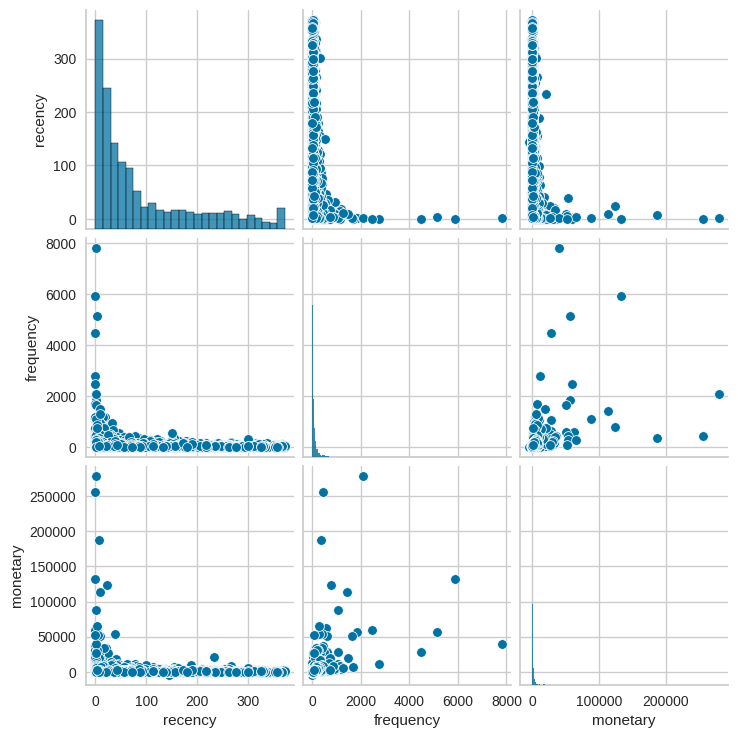

In [137]:
sns.pairplot(customer_df)

Obeserving the monetary v recency plot, we can see that a most customers' purchases are below 50000. However, we also noticed that all big purchases (above 50000) have happend recently.

### Preprocessing


Distance-based algorithms (like K-means) are sensitive to feature scale. In order to prevent bias we will perform feature scaling to normalize our data.

In [138]:
scaler = MinMaxScaler()
customer_df_norm = scaler.fit_transform(customer_df)
print(customer_df_norm)

[[8.71313673e-01 1.28024581e-04 1.51091712e-02]
 [2.68096515e-03 2.31724491e-02 3.02971721e-02]
 [1.98391421e-01 3.84073742e-03 2.14424619e-02]
 ...
 [1.87667560e-02 1.53629497e-03 1.57314917e-02]
 [8.04289544e-03 9.21776981e-02 2.23174105e-02]
 [1.12600536e-01 8.83369607e-03 2.15835588e-02]]


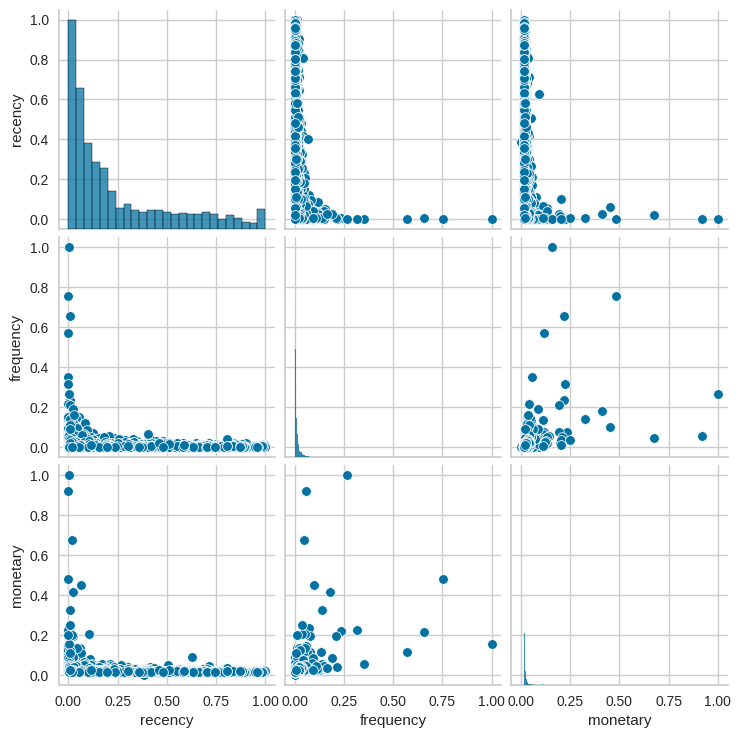

In [139]:
# visualize normalized data
cdn_df = pd.DataFrame(customer_df_norm)

cdn_df.rename(columns={0: 'recency',
                      1: 'frequency',
                      2: 'monetary'}, inplace=True)
sns.pairplot(cdn_df)

Comparing the pairplots of the scaled and [not scaled dataset](https://colab.research.google.com/drive/1ngdl2_86CvlHC2JjXqZy6pheUZhsovZl#scrollTo=mUhRZwi8eA-w&line=1&uniqifier=1) you can observe how the values of each feature are within the same range (0 - 1).

## 3. K-means Clustering

We are going to use K-means clustering to group data points in a pre-defined number of clusters.

#### Determine the Number of Clusters (K)

We are going to use the Elbow Method to determine the most reasonable number of clusters to use.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

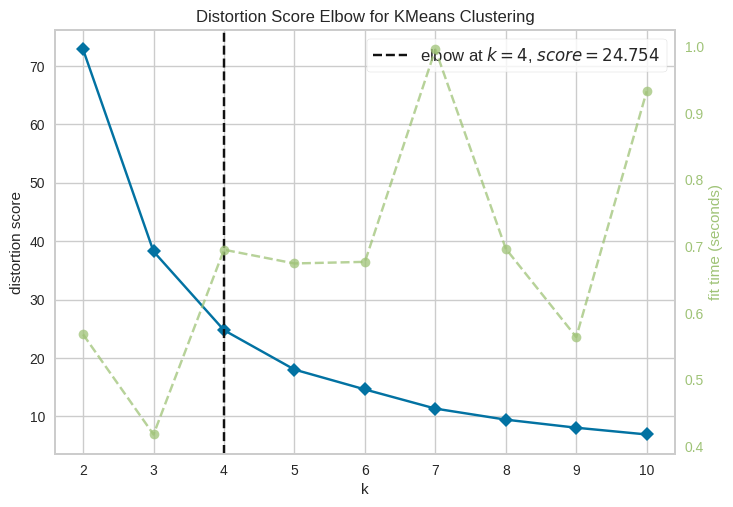

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion')
visualizer.fit(customer_df_norm)
visualizer.show()

In the elbow plot, we observed that there was a sharp increase in performance (decreased distortion) from cluster 2 to 3, and the performance remained roughly the same after 4 clusters. Hence we choose 4 as the optimal cluster number.

#### Fit the K-means model

In [141]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customer_df_norm)

cdn_df['cluster'] = model.labels_

cdn_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,recency,frequency,monetary,cluster
0,0.871314,0.000128,0.015109,1
1,0.002681,0.023172,0.030297,2
2,0.198391,0.003841,0.021442,0
3,0.048257,0.009218,0.021303,2
4,0.828418,0.002048,0.016288,1
5,0.093834,0.012034,0.020555,2
6,0.544236,0.000384,0.015423,3
7,0.619303,0.007297,0.018913,3
8,0.571046,0.001536,0.016728,3
9,0.058981,0.007425,0.025016,2


In [142]:
cdn_df.describe()

,recency,frequency,monetary,cluster
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,0.244094,0.011632,0.021782,1.534767
std,0.270149,0.029346,0.028962,1.008511
min,0.000000,0.000000,0.000000,0.000000
25%,0.042895,0.002048,0.016137,1.000000
50%,0.131367,0.005121,0.017379,2.000000
75%,0.380697,0.012578,0.020777,2.000000
max,1.000000,1.000000,1.000000,3.000000


### 4. Model Analysis

<ipython-input-143-256a3508657a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cluster_mean, x='cluster', y='recency', ax=axes[0], palette="husl")
<ipython-input-143-256a3508657a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cluster_mean, x='cluster', y='frequency', ax=axes[1], palette="husl")
<ipython-input-143-256a3508657a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cluster_mean, x='cluster', y='monetary', ax=axes[2], palette="husl")


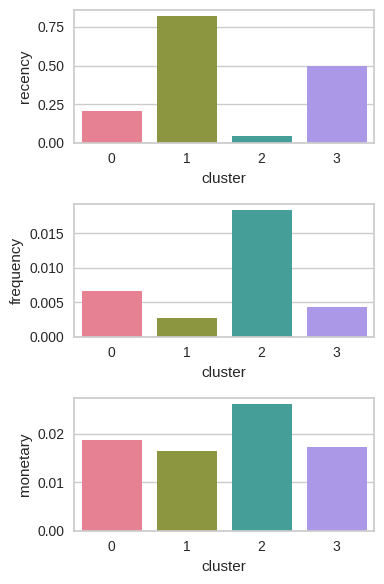

In [143]:
cluster_mean = cdn_df.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='recency', ax=axes[0], palette="husl")
sns.barplot(cluster_mean, x='cluster', y='frequency', ax=axes[1], palette="husl")
sns.barplot(cluster_mean, x='cluster', y='monetary', ax=axes[2], palette="husl")

plt.tight_layout()

In [144]:
cdn_df['cluster'].value_counts()

cluster
2    2157
0    1059
3     620
1     536
Name: count, dtype: int64

From the cluster v feature plots, we notice some behaivours that we can use to label each clusters based on the recency, monetary, and frequency values.

**Cluster 0:** Fairly recent, and low frequent purchases but second highest monetary values. They could be considered customers with highest potential for more spendings if they buy more, and could be targeted for premium offerings to convert them to our loyal customers. Label should be "Potential Loyalist"

**Cluster 1:** Less recent, low frequency, but fairly good spendings. This group of customers could be lebeled "at risk" and are ripe for targeted re-engagement.

**Cluster 2:** High recency with high frequency, and highest spenders. Hence, can be characterized/labeled as our "loyal" customers.

**Cluster 3:** Fairly less recent, low frequency, and high spenders. These customers should be labeled "attention required" but not quite urgent as Cluster 1.

## 5. Conclusion


We use K-means model to group customer data points into clusters with observable purchase behaivours. These has provided insights into the nature of the business' customer base and which group to target marketing resources to potentially increase revenue.